In [259]:
import sys
sys.path.append('../SCR/')
sys.path.append('../SYS/')
import pandapower as pp
import pandapower.networks as pn
import pandapower.estimation as se
from FluxPot import FluxoDePotencia
from EstimadorDeEstados import EstimacaoDeEstados
from gerador_de_cenario import GeradorCenario
import pandas as pd
import random
import math as m
# Importar as bibliotecas necessárias
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import time
# Usando Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# Carregar um conjunto de dados de exemplo
# Nota: A partir do Scikit-learn 1.2, o dataset Boston foi removido. 
# Se você estiver usando uma versão mais recente, substitua o load_boston por um outro dataset como o fetch_california_housing.


In [260]:
EOPF_case14 = "2-10-12-13"
SIA_RNA_case14 = "5-6-7-12"


EOPF_case33 = "7-14-26-27"
SIA_RNA_case33 = "1-4-18-21"

In [261]:
ALOCACAO = EOPF_case14
SISTEMA =  pn.case14
ERRO_MEDIDOR = 1.04

data_SIM = {
    "Descrição": "(Análise 3) : 4 UMFs com alocação SIA",
}

ANALISE_REALIZADA = data_SIM["Descrição"]


In [262]:
net = SISTEMA()
NBAR = len(net.bus)
NCEN = 2500
NVAL = 10**3
cenario = GeradorCenario(net=net)

In [263]:
RedeEletrica_simulada = net
cenario.DLOAD()
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,16.175965,0.425998,0.0,0.0,NaN,1.0,True,None,False
1,None,2,81.883683,0.425998,0.0,0.0,NaN,1.0,True,None,False
2,None,3,53.385791,0.425998,0.0,0.0,NaN,1.0,True,None,False
3,None,4,7.372430,0.425998,0.0,0.0,NaN,1.0,True,None,False
4,None,5,9.023782,0.425998,0.0,0.0,NaN,1.0,True,None,False
5,None,8,17.875333,0.425998,0.0,0.0,NaN,1.0,True,None,False
6,None,9,9.654226,0.425998,0.0,0.0,NaN,1.0,True,None,False
7,None,10,2.795121,0.425998,0.0,0.0,NaN,1.0,True,None,False
8,None,11,5.396642,0.425998,0.0,0.0,NaN,1.0,True,None,False
9,None,12,11.043211,0.425998,0.0,0.0,NaN,1.0,True,None,False


In [264]:
simulacao = FluxoDePotencia(RedeEletrica_simulada=RedeEletrica_simulada,
data_SIM=data_SIM)   

 [...] Fluxo de Potência Executado 


In [265]:
indexadores = [f"V_{i}" for i in range(1,NBAR+1)]
indexadores = indexadores + [f"Ang_{i}" for i in range(1,NBAR+1)]


df = pd.DataFrame({
        f'Identificador': indexadores
    })
df = df.T

P_index = [f"P_{i}" for i in range(1,NBAR+1)]
histograma_P = pd.DataFrame({
        f'Identificador': P_index
    })

histograma_P = histograma_P.T



In [266]:
inicio_simulacao = time.time()

for n in range(1,NCEN+1):
    RedeEletrica_simulada = net
    cenario.DLOAD()

    rodar_FluxPot = True
    while rodar_FluxPot:
        try:   
            simulacao = FluxoDePotencia(RedeEletrica_simulada=RedeEletrica_simulada,
                                        data_SIM=data_SIM)   
    
            resultado = simulacao.RedeEletrica_simulada.res_bus
            rodar_FluxPot = False
        except:
            print('Sistema não convergiu, sorteando outro')
            RedeEletrica_simulada = net
            cenario.DLOAD()

    amostra = pd.concat([resultado['vm_pu'],resultado['va_degree']])
    amostra = amostra.reset_index(drop=True)
    amostra = amostra.T

    novo_df = pd.DataFrame({
        f'Rodada_{n}': amostra
    })

    df = pd.concat([df,novo_df.T])
    
    P_amostra = resultado['p_mw']
    P_amostra = P_amostra.reset_index(drop=True)
    P_amostra = P_amostra
    
    novo_P = pd.DataFrame({
            f'Rodada_{n}': P_amostra
        })
    histograma_P = pd.concat([histograma_P,novo_P.T])
                             
    print(f'{n}/{NCEN}')

fim_simulacao = time.time()
print(f'TEMPO DE RODADA: {fim_simulacao-inicio_simulacao}')

 [...] Fluxo de Potência Executado 
1/2500


 [...] Fluxo de Potência Executado 
2/2500
 [...] Fluxo de Potência Executado 
3/2500
 [...] Fluxo de Potência Executado 
4/2500
 [...] Fluxo de Potência Executado 
5/2500
 [...] Fluxo de Potência Executado 
6/2500
 [...] Fluxo de Potência Executado 
7/2500
 [...] Fluxo de Potência Executado 
8/2500
 [...] Fluxo de Potência Executado 
9/2500
 [...] Fluxo de Potência Executado 
10/2500
 [...] Fluxo de Potência Executado 
11/2500
 [...] Fluxo de Potência Executado 
12/2500
 [...] Fluxo de Potência Executado 
13/2500
 [...] Fluxo de Potência Executado 
14/2500
 [...] Fluxo de Potência Executado 
15/2500
 [...] Fluxo de Potência Executado 
16/2500
 [...] Fluxo de Potência Executado 
17/2500
 [...] Fluxo de Potência Executado 
18/2500
 [...] Fluxo de Potência Executado 
19/2500
 [...] Fluxo de Potência Executado 
20/2500
 [...] Fluxo de Potência Executado 
21/2500
 [...] Fluxo de Potência Executado 
22/2500
 [...] Fluxo de Potência Executado 
23/2500
 [...] Fluxo de Potência Executado 
24/2

In [267]:
histograma_P.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Identificador,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14
Rodada_1,-218.625796,-23.429727,94.638917,55.369737,8.800221,7.986627,0.0,0.0,21.768381,9.221495,3.402297,5.043341,8.886944,14.642941
Rodada_2,-205.096744,-21.74475,93.267102,46.469983,9.486113,8.881441,0.0,0.0,19.844735,8.175693,3.31003,4.707603,9.192183,12.630916
Rodada_3,-199.168008,-23.400753,97.879039,34.553121,8.15891,7.197596,0.0,0.0,21.220001,9.474267,3.676636,5.204617,10.866444,13.708775
Rodada_4,-203.99929,-23.235371,106.284879,27.623565,8.546692,6.380923,0.0,0.0,21.191437,9.889636,4.068432,6.12999,10.199998,15.562197


In [268]:
primeira_linha = df.iloc[0]
df.columns = primeira_linha
df = df.iloc[1:].reset_index(drop=True)

primeira_linha = histograma_P.iloc[0]
histograma_P.columns = primeira_linha
histograma_P = histograma_P[1:].reset_index(drop=True)

In [269]:
histograma_P.head()

Identificador,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14
0,-218.625796,-23.429727,94.638917,55.369737,8.800221,7.986627,0.0,0.0,21.768381,9.221495,3.402297,5.043341,8.886944,14.642941
1,-205.096744,-21.74475,93.267102,46.469983,9.486113,8.881441,0.0,0.0,19.844735,8.175693,3.31003,4.707603,9.192183,12.630916
2,-199.168008,-23.400753,97.879039,34.553121,8.15891,7.197596,0.0,0.0,21.220001,9.474267,3.676636,5.204617,10.866444,13.708775
3,-203.99929,-23.235371,106.284879,27.623565,8.546692,6.380923,0.0,0.0,21.191437,9.889636,4.068432,6.12999,10.199998,15.562197
4,-235.984009,-25.941719,131.867695,28.650724,7.37673,6.610401,0.0,0.0,23.505772,7.850147,4.317098,6.038502,11.594818,18.50534


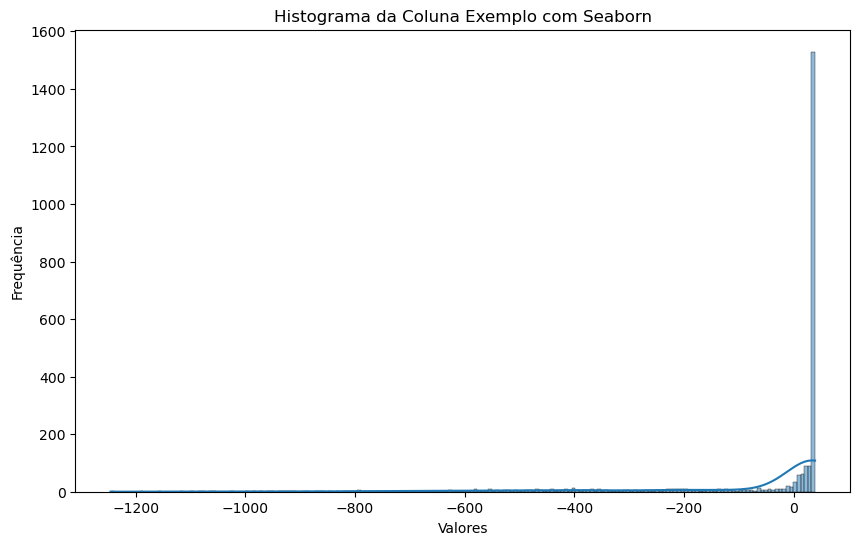

In [270]:
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = histograma_P.P_1.min()
MAX =  histograma_P.P_1.max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.1)
sns.histplot(histograma_P.P_1,  kde=True)
plt.title('Histograma da Coluna Exemplo com Seaborn')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [271]:
df.head()

Identificador,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,Ang_1,Ang_2,Ang_3,Ang_4,Ang_5,Ang_6,Ang_7,Ang_8,Ang_9,Ang_10,Ang_11,Ang_12,Ang_13,Ang_14
0,1.06,1.045,1.01,1.021618,1.02325,1.07,1.075006,1.09,1.082429,1.076826,1.071378,1.063738,1.063256,1.063215,0.0,-4.660955,-12.331965,-9.901147,-8.298804,-12.525029,-12.407266,-12.407266,-13.679261,-13.85408,-13.369752,-13.304263,-13.471694,-14.696627
1,1.06,1.045,1.01,1.023851,1.024922,1.07,1.076443,1.09,1.084209,1.078627,1.072407,1.064221,1.063898,1.065969,0.0,-4.367318,-11.717457,-9.19241,-7.739851,-11.753314,-11.513193,-11.513193,-12.691797,-12.866305,-12.483437,-12.477821,-12.635853,-13.617507
2,1.06,1.045,1.01,1.025001,1.025673,1.07,1.076705,1.09,1.084286,1.078295,1.072052,1.063486,1.062828,1.064776,0.0,-4.239134,-11.7376,-8.867323,-7.493175,-11.683511,-11.401632,-11.401632,-12.689979,-12.903769,-12.486564,-12.500273,-12.682846,-13.720514
3,1.06,1.045,1.01,1.025559,1.025905,1.07,1.076812,1.09,1.084277,1.078117,1.071781,1.062656,1.062595,1.063332,0.0,-4.369612,-12.329517,-8.969931,-7.603674,-11.883227,-11.596921,-11.596921,-12.933098,-13.160585,-12.734686,-12.773776,-12.917054,-14.10277
4,1.06,1.045,1.01,1.02417,1.024547,1.07,1.075908,1.09,1.083181,1.077675,1.071447,1.062248,1.061146,1.059927,0.0,-5.136425,-14.873866,-10.275167,-8.668639,-13.320291,-13.052297,-13.052297,-14.464311,-14.610041,-14.189968,-14.275997,-14.484078,-15.880171


In [272]:
V = df.loc[:,'V_1':f'V_{NBAR}']
Ang = df.loc[:,'Ang_1':f'Ang_{NBAR}']
ESTADOS = V.join(Ang)
ESTADOS.head()

Identificador,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,Ang_1,Ang_2,Ang_3,Ang_4,Ang_5,Ang_6,Ang_7,Ang_8,Ang_9,Ang_10,Ang_11,Ang_12,Ang_13,Ang_14
0,1.06,1.045,1.01,1.021618,1.02325,1.07,1.075006,1.09,1.082429,1.076826,1.071378,1.063738,1.063256,1.063215,0.0,-4.660955,-12.331965,-9.901147,-8.298804,-12.525029,-12.407266,-12.407266,-13.679261,-13.85408,-13.369752,-13.304263,-13.471694,-14.696627
1,1.06,1.045,1.01,1.023851,1.024922,1.07,1.076443,1.09,1.084209,1.078627,1.072407,1.064221,1.063898,1.065969,0.0,-4.367318,-11.717457,-9.19241,-7.739851,-11.753314,-11.513193,-11.513193,-12.691797,-12.866305,-12.483437,-12.477821,-12.635853,-13.617507
2,1.06,1.045,1.01,1.025001,1.025673,1.07,1.076705,1.09,1.084286,1.078295,1.072052,1.063486,1.062828,1.064776,0.0,-4.239134,-11.7376,-8.867323,-7.493175,-11.683511,-11.401632,-11.401632,-12.689979,-12.903769,-12.486564,-12.500273,-12.682846,-13.720514
3,1.06,1.045,1.01,1.025559,1.025905,1.07,1.076812,1.09,1.084277,1.078117,1.071781,1.062656,1.062595,1.063332,0.0,-4.369612,-12.329517,-8.969931,-7.603674,-11.883227,-11.596921,-11.596921,-12.933098,-13.160585,-12.734686,-12.773776,-12.917054,-14.10277
4,1.06,1.045,1.01,1.02417,1.024547,1.07,1.075908,1.09,1.083181,1.077675,1.071447,1.062248,1.061146,1.059927,0.0,-5.136425,-14.873866,-10.275167,-8.668639,-13.320291,-13.052297,-13.052297,-14.464311,-14.610041,-14.189968,-14.275997,-14.484078,-15.880171


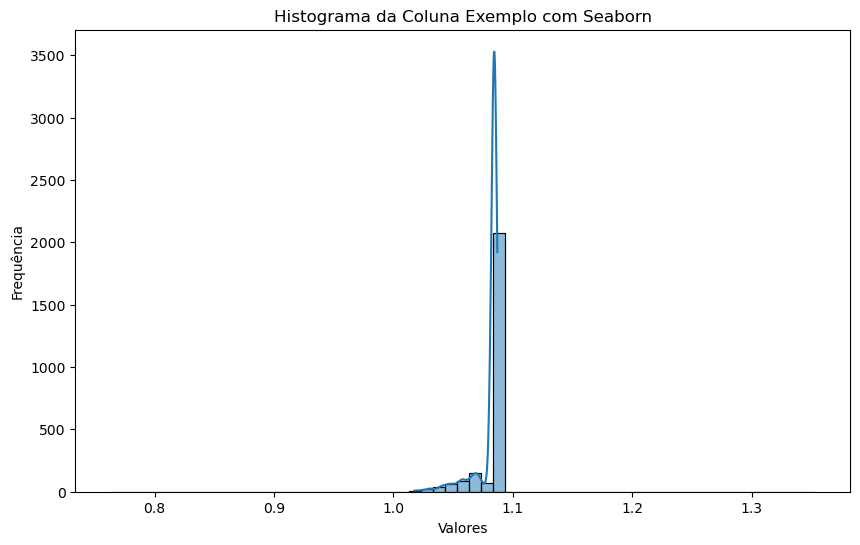

In [273]:
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = ESTADOS[f'V_{NBAR}'].min()
MAX =  ESTADOS[f'V_{NBAR}'].max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.01)
sns.histplot(ESTADOS[f'V_{NBAR}'], bins=bins, kde=True)
plt.title('Histograma da Coluna Exemplo com Seaborn')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

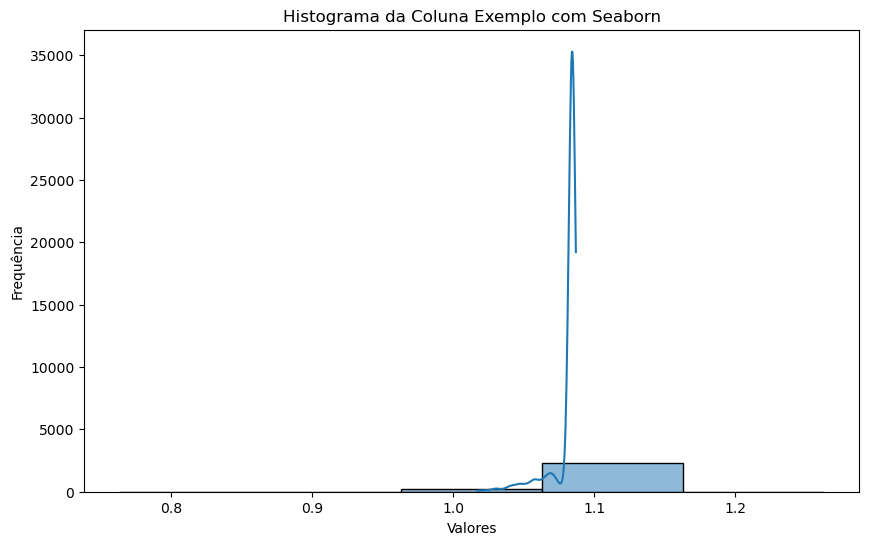

In [274]:
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = ESTADOS[f'V_{NBAR}'].min()
MAX =  ESTADOS[f'V_{NBAR}'].max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.1)
sns.histplot(ESTADOS[f'V_{NBAR}'], bins=bins, kde=True)
plt.title('Histograma da Coluna Exemplo com Seaborn')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [275]:
MED = [int(i) for i in ALOCACAO.split('-')]
V_med = V[[f'V_{x}' for x in MED]]
Ang_med = Ang[[f'Ang_{x}' for x in MED]]
MEDICOES = V_med.join(Ang_med)
MEDICOES.head()


Identificador,V_2,V_10,V_12,V_13,Ang_2,Ang_10,Ang_12,Ang_13
0,1.045,1.076826,1.063738,1.063256,-4.660955,-13.85408,-13.304263,-13.471694
1,1.045,1.078627,1.064221,1.063898,-4.367318,-12.866305,-12.477821,-12.635853
2,1.045,1.078295,1.063486,1.062828,-4.239134,-12.903769,-12.500273,-12.682846
3,1.045,1.078117,1.062656,1.062595,-4.369612,-13.160585,-12.773776,-12.917054
4,1.045,1.077675,1.062248,1.061146,-5.136425,-14.610041,-14.275997,-14.484078


In [276]:

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(MEDICOES, ESTADOS, test_size=0.3, random_state=42)

# Padronizar os dados (importante para redes neurais)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [277]:
# Criar o modelo de rede neural
mlp = MLPRegressor(hidden_layer_sizes=NBAR,
                   max_iter=1000,
                   solver='adam',
                   random_state=42,
                   tol=0.0001,
                   verbose=True,
                   validation_fraction=0.2,
                   n_iter_no_change=500)

# Treinar o modelo
mlp.fit(X_train, y_train)

Iteration 1, loss = 25.21512255
Iteration 2, loss = 22.57800046
Iteration 3, loss = 20.09137188
Iteration 4, loss = 18.00651296
Iteration 5, loss = 16.16823586
Iteration 6, loss = 14.42061967
Iteration 7, loss = 12.92732274
Iteration 8, loss = 11.58930865
Iteration 9, loss = 10.38079352
Iteration 10, loss = 9.38830952
Iteration 11, loss = 8.44322694
Iteration 12, loss = 7.62618344
Iteration 13, loss = 6.96004839
Iteration 14, loss = 6.37270169
Iteration 15, loss = 5.84800052
Iteration 16, loss = 5.37718361
Iteration 17, loss = 4.96722913
Iteration 18, loss = 4.60073935
Iteration 19, loss = 4.27040605
Iteration 20, loss = 3.95609220
Iteration 21, loss = 3.67201674
Iteration 22, loss = 3.40070548
Iteration 23, loss = 3.15113261
Iteration 24, loss = 2.91236100
Iteration 25, loss = 2.68581555
Iteration 26, loss = 2.47285139
Iteration 27, loss = 2.26461312
Iteration 28, loss = 2.07025066
Iteration 29, loss = 1.88503914
Iteration 30, loss = 1.72128662
Iteration 31, loss = 1.55667824
Iteratio

/home/lucasedbraga/anaconda3/envs/otm_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



MLPRegressor(hidden_layer_sizes=14, max_iter=1000, n_iter_no_change=500,
             random_state=42, validation_fraction=0.2, verbose=True)

In [278]:
# Fazer previsões no conjunto de teste
y_pred = mlp.predict(X_test)

# Avaliar o modelo
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.029498343683269607
R^2 Score: -1.0370877441043048e+27


# Validacao

In [279]:
def calcula_metricas(df_results):
    SEE = m.sqrt(
            sum(
                ((df_results['vm_pu']-df_results['v_estimated'])**2)
            )
            +
            sum(
                ((np.deg2rad(df_results['va_degree'])-np.deg2rad(df_results['ang_estimated']))**2)
            )
        )
    
    IVM =  abs(
                max(
                    (abs(df_results['vm_pu'])-abs(df_results['v_estimated']))
                    /
                    abs(df_results['vm_pu'])
                )
            )*100
    
    IPA = abs(
                max(
                    (np.deg2rad(df_results['va_degree'])-np.deg2rad(df_results['ang_estimated']))
                )
            )*100
    
    OBF = SEE + IVM + IPA
   
    tabela_resultado = pd.DataFrame({

        '(EEE) SEE' : [SEE],
        '(EMT) IVM' : [IVM],
        '(EAF) IPA' : [IPA],
        '(IGE) OBF' : [OBF]
    })
    return tabela_resultado

In [280]:
df_val =  pd.DataFrame({
    'Identificador': indexadores})
df_val = df_val.T

inicio_simulacao = time.time()
for n in range(1,NVAL+1):

    RedeEletrica_simulada = net
    cenario.DLOAD()
    rodar_FluxPot = True
    while rodar_FluxPot:
        try:   
            simulacao = FluxoDePotencia(RedeEletrica_simulada=RedeEletrica_simulada,
                                        data_SIM=data_SIM)   
    
            resultado = simulacao.RedeEletrica_simulada.res_bus
            rodar_FluxPot = False
        except:
            RedeEletrica_simulada = net
            cenario.DLOAD()


    amostra = pd.concat([resultado['vm_pu'],resultado['va_degree']])
    amostra = amostra.reset_index(drop=True)
    amostra = amostra.T
    amostra_val = pd.DataFrame({f'Validacao_{n}': amostra})
    df_val = pd.concat([df_val,amostra_val.T])
    print(f'{n}/{NVAL}')

fim_simulacao = time.time()
print(f'TEMPO DE RODADA: {fim_simulacao-inicio_simulacao}')


primeira_linha = df_val.iloc[0]
df_val.columns = primeira_linha
df_val = df_val.iloc[1:].reset_index(drop=True)
V_teste = df_val[[f'V_{x}' for x in MED]]
Ang_teste = df_val[[f'Ang_{x}' for x in MED]]
MEDICOES_teste = V_teste.join(Ang_teste)

# Gerar um valor aleatório
# Função para multiplicar por um valor aleatório
def erro_de_medicao(x):
    valor_aleatorio = np.random.uniform(1, ERRO_MEDIDOR)
    return x * valor_aleatorio

# Multiplicar cada elemento do DataFrame pelo valor aleatório
MEDICOES_teste = MEDICOES_teste.applymap(erro_de_medicao)
MEDICOES_teste.head()

 [...] Fluxo de Potência Executado 
1/1000


 [...] Fluxo de Potência Executado 
2/1000
 [...] Fluxo de Potência Executado 
3/1000
 [...] Fluxo de Potência Executado 
4/1000
 [...] Fluxo de Potência Executado 
5/1000
 [...] Fluxo de Potência Executado 
6/1000
 [...] Fluxo de Potência Executado 
7/1000
 [...] Fluxo de Potência Executado 
8/1000
 [...] Fluxo de Potência Executado 
9/1000
 [...] Fluxo de Potência Executado 
10/1000
 [...] Fluxo de Potência Executado 
11/1000
 [...] Fluxo de Potência Executado 
12/1000
 [...] Fluxo de Potência Executado 
13/1000
 [...] Fluxo de Potência Executado 
14/1000
 [...] Fluxo de Potência Executado 
15/1000
 [...] Fluxo de Potência Executado 
16/1000
 [...] Fluxo de Potência Executado 
17/1000
 [...] Fluxo de Potência Executado 
18/1000
 [...] Fluxo de Potência Executado 
19/1000
 [...] Fluxo de Potência Executado 
20/1000
 [...] Fluxo de Potência Executado 
21/1000
 [...] Fluxo de Potência Executado 
22/1000
 [...] Fluxo de Potência Executado 
23/1000
 [...] Fluxo de Potência Executado 
24/1

Identificador,V_2,V_10,V_12,V_13,Ang_2,Ang_10,Ang_12,Ang_13
0,1.074367,1.111718,1.111701,1.104639,1.386094,1.053030,1.358689,1.305926
1,1.046731,1.117685,1.089977,1.102933,1.424673,1.047792,1.318235,1.263700
2,1.060670,1.102033,1.084522,1.107509,1.400789,1.034016,1.362019,1.285757
3,1.066702,1.127430,1.074673,1.113619,1.399733,1.044366,1.344454,1.281673
4,1.086322,1.116978,1.075805,1.104453,1.399514,1.041408,1.338007,1.279302


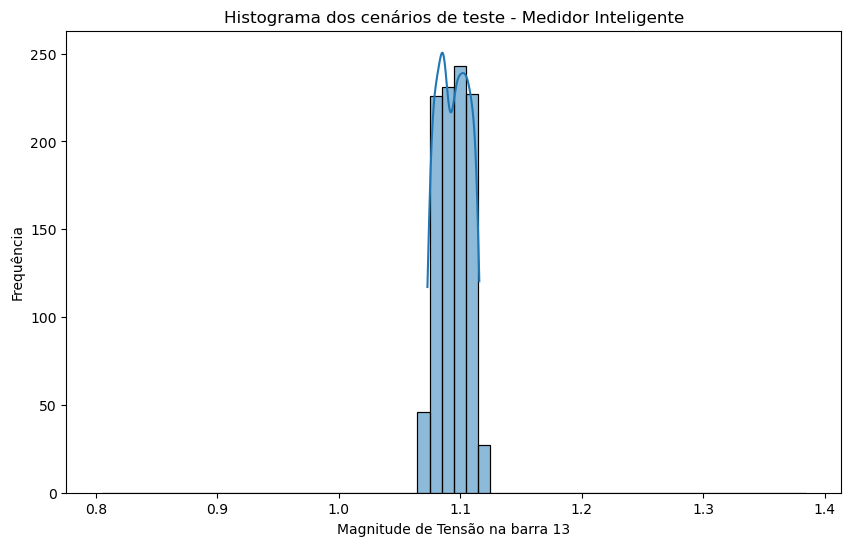

In [281]:
# Usando Seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = MEDICOES_teste[f'V_{max(MED)}'].min()
MAX =  MEDICOES_teste[f'V_{max(MED)}'].max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.01)
sns.histplot(MEDICOES_teste[f'V_{max(MED)}'], bins=bins, kde=True)
plt.title('Histograma dos cenários de teste - Medidor Inteligente')
plt.xlabel(f'Magnitude de Tensão na barra {max(MED)}')
plt.ylabel('Frequência')
plt.show()

In [282]:
# Fazer previsões no conjunto de teste
y_pred_val = mlp.predict(MEDICOES_teste)

In [283]:
df_results =  pd.DataFrame()

for cenario_teste in range(len(y_pred_val)):
    predicao = pd.Series(y_pred_val[cenario_teste])
    V_estimado = predicao[:NBAR].reset_index(drop=True)
    Ang_estimado = predicao[NBAR:].reset_index(drop=True)
    real = simulacao.RedeEletrica_simulada.res_bus
    
    df_cenario = real
    df_cenario['v_estimated'] = V_estimado
    df_cenario['ang_estimated'] = Ang_estimado
    
    df_results = pd.concat([df_results,calcula_metricas(df_results=df_cenario)])

df_results.head()

,(EEE) SEE,(EMT) IVM,(EAF) IPA,(IGE) OBF
0,0.067993,0.997961,0.015626,1.081580
0,0.051089,0.234783,0.022131,0.308002
0,0.050055,0.378937,0.016550,0.445542
0,0.076387,0.335477,0.028919,0.440783
0,0.072862,0.545136,0.033035,0.651032


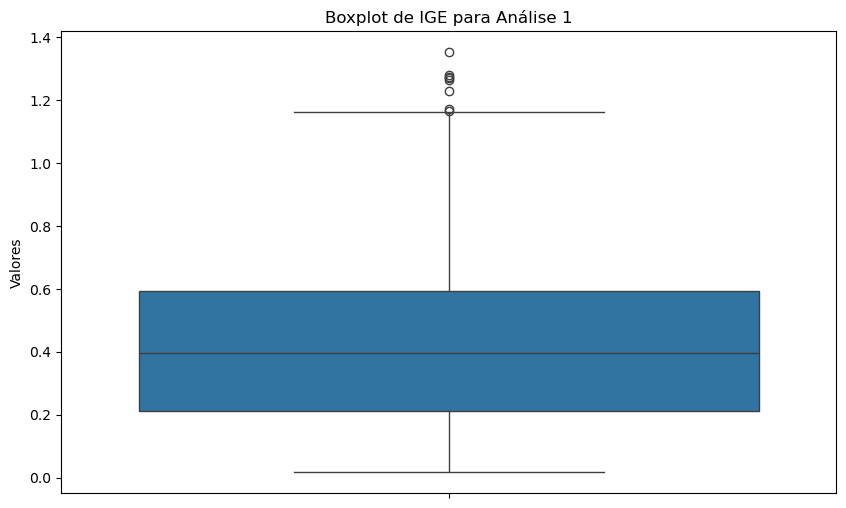

In [295]:
# Plotar o boxplot para a coluna_exemplo
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_results['(IGE) OBF'])
plt.title('Boxplot de IGE para Análise 1')
plt.ylabel('Valores')
plt.show()

In [285]:
df_results.head()

,(EEE) SEE,(EMT) IVM,(EAF) IPA,(IGE) OBF
0,0.067993,0.997961,0.015626,1.081580
0,0.051089,0.234783,0.022131,0.308002
0,0.050055,0.378937,0.016550,0.445542
0,0.076387,0.335477,0.028919,0.440783
0,0.072862,0.545136,0.033035,0.651032


In [286]:
# Gerar a tabela LaTeX
RESULTADO = pd.DataFrame(
    {
        'FOB_medio': [df_results['(IGE) OBF'].mean()],
        'FOB_devpad': [df_results['(IGE) OBF'].std()],
        'EMT_medio':[df_results['(EMT) IVM'].mean()],
        'EMT_devpad':[df_results['(EMT) IVM'].std()],
        'EAF_medio':[df_results['(EAF) IPA'].mean()],
        'EAF_devpad':[df_results['(EAF) IPA'].std()],
        'EEE_medio': [df_results['(EEE) SEE'].mean()],
        'EEE_devpad': [df_results['(EEE) SEE'].std()],
        #'(EEE) SEE_devpad': [df_results.SEE.std()],
        #'(EEE) SEE_max': [df_results.SEE.max()],    
    }
)

RESULTADO

,FOB_medio,FOB_devpad,EMT_medio,EMT_devpad,EAF_medio,EAF_devpad,EEE_medio,EEE_devpad
0,0.43559,0.268297,0.367342,0.258334,0.019344,0.014171,0.048904,0.015251


In [287]:
latex_table = RESULTADO.to_latex(index=False)

# Salvar a tabela LaTeX em um arquivo
with open('tabela.tex', 'w') as f:
    f.write(latex_table)

/tmp/ipykernel_12091/128792389.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



# ANALISE RNA

In [296]:
def compara_tensao(data_vm_pu_calc, data_vm_pu_est, analise_realizada):

    def plot_comparativo(series1, series2, analise_realizada):
        # Verificar se as séries têm o mesmo índice
        if not series1.index.equals(series2.index):
            raise ValueError("Os índices das séries devem ser iguais.")
        
        # Definir categorias como índices das séries
        categorias = series1.index.tolist()
        
        # Obter os valores das séries
        valores1 = series1.values.tolist()
        valores2 = series2.values.tolist()
        
        # Calcular a diferença entre os valores das séries
        diferenca = series1 - series2
        
        # Criar figura com duas subplots (gráfico de barras e gráfico de linha)
        fig = go.Figure()
        
        # Adicionar as duas barras ao gráfico de barras
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores1,
            name='REAL',  # Nome da primeira série
            marker=dict(color='#008000')
        ))
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores2,
            name='ESTIMADO',
            marker=dict(color='#FFC107')  # Nome da segunda série
        ))
        
        # Criar subplot para o gráfico de linha
        fig.add_trace(go.Scatter(
            x=list(range(1, len(categorias) + 1)),
            y=diferenca.values.tolist(),
            mode='lines+markers',
            name='Erro',  # Nome da linha
            yaxis='y2',
            line=dict(color='red')  # Utiliza o segundo eixo y para o gráfico de linha
        ))
        
        # Encontrar o máximo valor absoluto da diferença
        max_diff = abs(diferenca).max()
        
        # Atualizar layout
        fig.update_layout(
            title=f'Estimação de Estados por RNA - {analise_realizada}',
            xaxis=dict(title='Barras', tickmode='array', tickvals=list(range(1, len(categorias) + 1)), ticktext=categorias),
            yaxis=dict(title='Magnitude de Tensão (pu)'),
            yaxis2=dict(title='Erro', overlaying='y', side='right', range=[-max_diff, max_diff]),  # Configurações do segundo eixo y
            barmode='group'  # Agrupa as barras
        )


        # # Definir layout da figura
        # fig.update_layout(
        #     width=15*37.79527559,  # 5 polegadas convertidas para pixels (1 polegada = 96 pixels)
        #     height=8*37.79527559,  # 3 polegadas convertidas para pixels
        #     margin=dict(l=0, r=0, t=0, b=0)  # Margens ajustadas para se ajustarem ao documento IEEEtran
        # )
        
        # Mostrar gráfico
        fig.show()
        
    plot_comparativo(series1=data_vm_pu_calc, series2=data_vm_pu_est, analise_realizada=analise_realizada)
 


In [297]:
def compara_angulo(data_vm_pu_calc, data_vm_pu_est, analise_realizada):

    def plot_comparativo(series1, series2, analise_realizada):
        # Verificar se as séries têm o mesmo índice
        if not series1.index.equals(series2.index):
            raise ValueError("Os índices das séries devem ser iguais.")
        
        # Definir categorias como índices das séries
        categorias = series1.index.tolist()
        
        # Obter os valores das séries
        valores1 = series1.values.tolist()
        valores2 = series2.values.tolist()
        
        # Calcular a diferença entre os valores das séries
        diferenca = series1 - series2
        
        # Criar figura com duas subplots (gráfico de barras e gráfico de linha)
        fig = go.Figure()
        
        # Adicionar as duas barras ao gráfico de barras
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores1,
            name='REAL',  # Nome da primeira série
            marker=dict(color='#008000')
        ))
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores2,
            name='ESTIMADO',
            marker=dict(color='#FFC107')  # Nome da segunda série
        ))
        
        # Criar subplot para o gráfico de linha
        fig.add_trace(go.Scatter(
            x=list(range(1, len(categorias) + 1)),
            y=diferenca.values.tolist(),
            mode='lines+markers',
            name='Erro',  # Nome da linha
            yaxis='y2',
            line=dict(color='red')  # Utiliza o segundo eixo y para o gráfico de linha
        ))
        
        # Encontrar o máximo valor absoluto da diferença
        max_diff = abs(diferenca).max()
        
        # Atualizar layout
        fig.update_layout(
            title=f'Estimação de Estados por RNA - {analise_realizada}',
            xaxis=dict(title='Barras', tickmode='array', tickvals=list(range(1, len(categorias) + 1)), ticktext=categorias),
            yaxis=dict(title='Abertura Angular (graus)'),
            yaxis2=dict(title='Erro', overlaying='y', side='right', range=[-max_diff, max_diff]),  # Configurações do segundo eixo y
            barmode='group'  # Agrupa as barras
        )
        #         # Definir layout da figura
        # fig.update_layout(
        #     width=15*37.79527559,  # 5 polegadas convertidas para pixels (1 polegada = 96 pixels)
        #     height=8*37.79527559,  # 3 polegadas convertidas para pixels
        #     margin=dict(l=0, r=0, t=0, b=0)  # Margens ajustadas para se ajustarem ao documento IEEEtran
        # )
        
        
        # Mostrar gráfico
        fig.show()
        
    plot_comparativo(series1=data_vm_pu_calc, series2=data_vm_pu_est, analise_realizada=analise_realizada)
 


In [298]:
df_cenario.head()

,vm_pu,va_degree,p_mw,q_mvar,v_estimated,ang_estimated,dif_v,dif_ang
0,1.060000,0.000000,3.903323e+01,-44.083341,1.061231,-0.011380,0.001231,0.011380
1,1.045000,1.370150,-4.000000e+01,22.592891,1.063087,1.387803,0.018087,0.017653
2,1.010000,1.799165,8.517306e-16,38.206738,1.023510,1.864160,0.013510,0.064995
3,1.039607,1.136586,2.041797e-14,0.425998,1.055980,1.145982,0.016373,0.009397
4,1.038744,1.111599,1.798602e-14,0.425998,1.046158,1.116857,0.007414,0.005258


In [299]:
# Calcular a diferença entre as duas colunas
erro = abs(df_cenario['vm_pu'] - df_cenario['v_estimated'])
df_cenario['dif_v'] = erro
# Plotar um gráfico de barras usando Plotly
fig = px.bar(df_cenario, x=df_cenario.index, y='dif_v', labels={'x': 'Índice', 'Diferença': 'Diferença'})
fig.show()


In [300]:
# Calcular a diferença entre as duas colunas
erro = abs(df_cenario['va_degree'] - df_cenario['ang_estimated'])
df_cenario['dif_ang'] = erro

# Plotar um gráfico de barras usando Plotly
fig = px.bar(df_cenario, x=df_cenario.index, y='dif_ang', labels={'x': 'Índice', 'Diferença': 'Diferença'})
fig.show()


In [301]:
compara_tensao(data_vm_pu_calc=real.vm_pu, data_vm_pu_est= V_estimado, analise_realizada=ANALISE_REALIZADA)

In [302]:
compara_angulo(data_vm_pu_calc=real.va_degree, data_vm_pu_est= Ang_estimado,analise_realizada=ANALISE_REALIZADA)